# Name: Ketki Kulkarni


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Loading the data set

bank = pd.read_csv('bank.csv')




In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
bank.drop(['job', 'marital', 'day','month','pdays','previous','poutcome'],axis=1,inplace=True)

In [7]:
bank.head()

,age,education,default,balance,housing,loan,contact,duration,campaign,y
0,30,primary,no,1787,no,no,cellular,79,1,no
1,33,secondary,no,4789,yes,yes,cellular,220,1,no
2,35,tertiary,no,1350,yes,no,cellular,185,1,no
3,30,tertiary,no,1476,yes,yes,unknown,199,4,no
4,59,secondary,no,0,yes,no,unknown,226,1,no


In [8]:
bank['housing'].replace(['no', 'yes'], [0,1], inplace=True)
bank['y'].replace(['no', 'yes'], [0,1], inplace=True)
bank['loan'].replace(['no', 'yes'], [0,1], inplace=True)
bank['default'].replace(['no','yes'],[0,1], inplace=True)
bank['contact'].replace(['cellular', 'telephone', 'unknown'], [0,1,2], inplace =True)
bank['education'].replace(['primary', 'secondary', 'tertiary','unknown'],[0,1,2,3], inplace = True)

In [9]:
bank.head()

,age,education,default,balance,housing,loan,contact,duration,campaign,y
0,30,0,0,1787,0,0,0,79,1,0
1,33,1,0,4789,1,1,0,220,1,0
2,35,2,0,1350,1,0,0,185,1,0
3,30,2,0,1476,1,1,2,199,4,0
4,59,1,0,0,1,0,2,226,1,0


In [10]:
bank.loc[(bank['loan'] == 1) & (bank['housing'] == 1)]

,age,education,default,balance,housing,loan,contact,duration,campaign,y
1,33,1,0,4789,1,1,0,220,1,0
3,30,2,0,1476,1,1,2,199,4,0
9,43,0,0,-88,1,1,0,313,1,0
14,31,1,0,360,1,1,0,89,1,0
48,32,0,1,-849,1,1,0,204,1,0
...,...,...,...,...,...,...,...,...,...,...
4502,42,1,0,-91,1,1,0,43,1,0
4504,42,1,0,1080,1,1,0,951,3,1
4508,42,3,0,642,1,1,2,509,2,0
4517,57,2,1,-3313,1,1,2,153,1,0


In [11]:
bank.isnull().sum()

age          0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
y            0
dtype: int64

<Axes: >

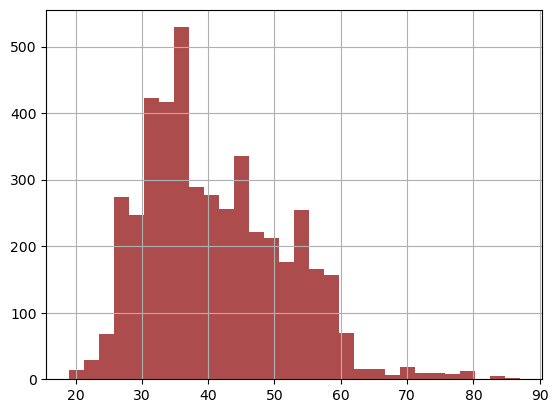

In [12]:
bank['age'].hist(bins=30,color='darkred',alpha=0.7)

bank.info()

### Building Logistic Regression Model

In [14]:
### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(bank.drop('y',axis=1), #X
                                                    bank['y'], test_size=0.30, #y
                                                    random_state=101)

### Training and Predicting 

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
print(logmodel.intercept_[0])
print(logmodel.coef_[0])

-0.41809417874997973
[-3.20495793e-02 -3.34684827e-01  9.11509887e-03  1.33104768e-05
 -6.92410734e-01 -2.55361756e-01 -8.91219509e-01  3.70569439e-03
 -1.38846832e-01]


In [20]:
X_test

,age,education,default,balance,housing,loan,contact,duration,campaign
2143,37,2,0,4089,1,0,0,289,2
3284,57,1,0,367,0,0,1,107,2
71,42,2,1,2,1,0,2,380,1
1311,51,1,0,867,1,0,0,177,2
3274,56,2,0,21664,0,0,2,214,8
...,...,...,...,...,...,...,...,...,...
1541,43,1,0,634,1,0,0,65,1
3920,42,1,0,613,1,0,0,432,2
1352,23,1,0,1021,0,0,1,79,9
1398,34,1,0,341,0,1,0,136,1


In [21]:
predictions = logmodel.predict(X_test)

In [22]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)
conf_matrix

array([[1181,   21],
       [ 128,   27]], dtype=int64)

NameError: name 'y_pred' is not defined

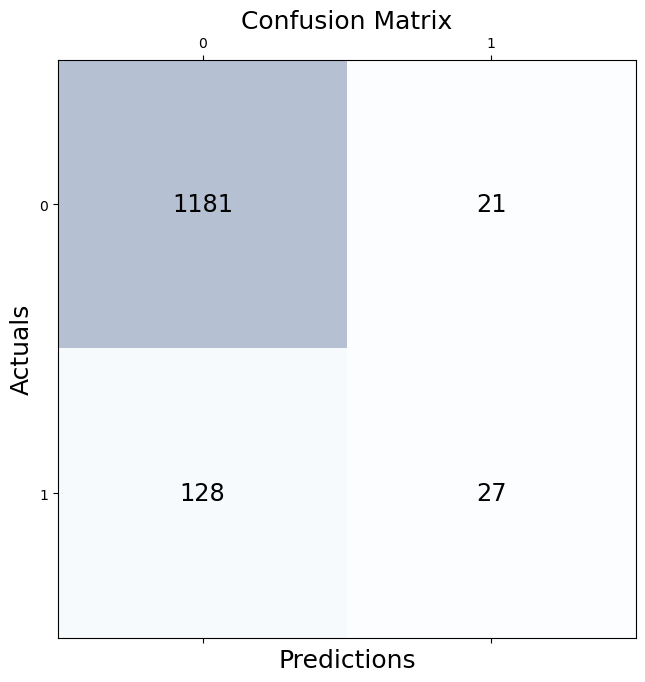

In [24]:
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
# TN FP
# FN TP

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1202
           1       0.56      0.17      0.27       155

    accuracy                           0.89      1357
   macro avg       0.73      0.58      0.60      1357
weighted avg       0.86      0.89      0.86      1357



In [27]:
len(logmodel.coef_[0])

9

In [28]:
w0 = logmodel.intercept_[0]
w = w1, w2, w3, w4, w5, w6, w7, w8, w9 = logmodel.coef_[0]
 
equation = "y = %f + (%f * x1) + (%f * x2) + (%f * x3) + (%f * x4) + (%f * x5) + (%f * x6) + (%f * x7) + (%f * x8) + (%f * x9)" % (w0, w1, w2, w3, w4, w5, w6, w7, w8, w9)
print(equation)

y = -0.418094 + (-0.032050 * x1) + (-0.334685 * x2) + (0.009115 * x3) + (0.000013 * x4) + (-0.692411 * x5) + (-0.255362 * x6) + (-0.891220 * x7) + (0.003706 * x8) + (-0.138847 * x9)


In [29]:
feature_names = ['age', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'duration', 'campaign']
# age 	education 	default 	balance 	housing 	loan 	contact 	duration 	campaign

In [30]:
w

array([-3.20495793e-02, -3.34684827e-01,  9.11509887e-03,  1.33104768e-05,
       -6.92410734e-01, -2.55361756e-01, -8.91219509e-01,  3.70569439e-03,
       -1.38846832e-01])

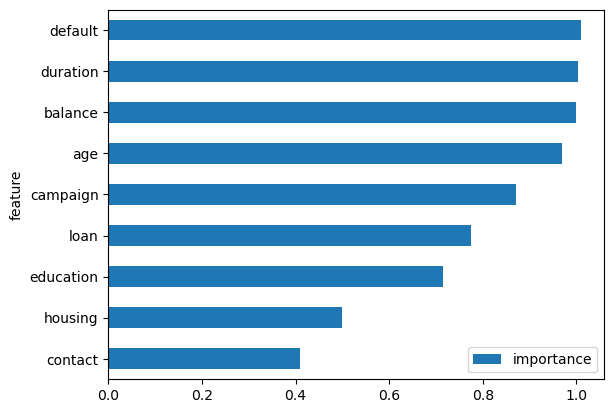

In [31]:
import math
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w) # pow(2, 3)
feature_importance = feature_importance.sort_values(by = ["importance"])
 
# from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

In [32]:
feature_importance

,feature,importance
6,contact,0.410155
4,housing,0.500368
1,education,0.715564
5,loan,0.774636
8,campaign,0.870361
0,age,0.968459
3,balance,1.000013
7,duration,1.003713
2,default,1.009157


# # KNN Algorithm

In [35]:
## Importing the KNN classifier algorithm
from sklearn.neighbors import KNeighborsClassifier
## Initializing the classifier
knn_clf = KNeighborsClassifier()
## Fitting the model with the training set
knn_clf.fit( X_train, y_train)

KNeighborsClassifier()

# ROC Curve

In [38]:
from sklearn import metrics
import matplotlib.pyplot as plt

## The method takes the three following parameters
## model: the classification model
## test_X: X features of the test set
## test_y: actual labels of the test set
## Returns
## - ROC Auc Score
## - FPR and TPRs for different threshold values
def draw_roc_curve( model, test_X, test_y ):
    ## Creating and initializing a results DataFrame with actual labels
    test_results_df = pd.DataFrame( { 'actual': test_y } )
    test_results_df = test_results_df.reset_index()
    # predict the probabilities on the test set
    predict_proba_df = pd.DataFrame( model.predict_proba( test_X ) )
    ## selecting the probabilities that the test example belongs to class 1
    test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]
    ## Invoke roc_curve() to return the fpr, tpr and threshold values.
    ## threshold values contain values from 0.0 to 1.0
    fpr, tpr, thresholds = metrics.roc_curve( test_results_df.actual, test_results_df.chd_1, drop_intermediate = False )
    ## Getting the roc auc score by invoking metrics.roc_auc_score method
    auc_score = metrics.roc_auc_score( test_results_df.actual, test_results_df.chd_1 )
    ## Setting the size of the plot
    plt.figure(figsize=(8, 6))
    ## plotting the actual fpr and tpr values
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    ## plotting th diagnoal line from (0,1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    ## Setting labels and titles
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return auc_score, fpr, tpr, thresholds

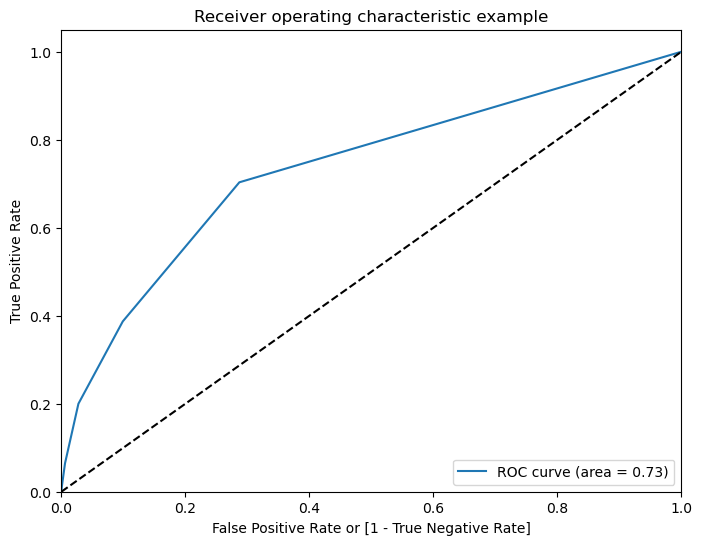

In [40]:
## Invoking draw_roc_curve with the KNN model
_, _, _, _ = draw_roc_curve( knn_clf, X_test, y_test)

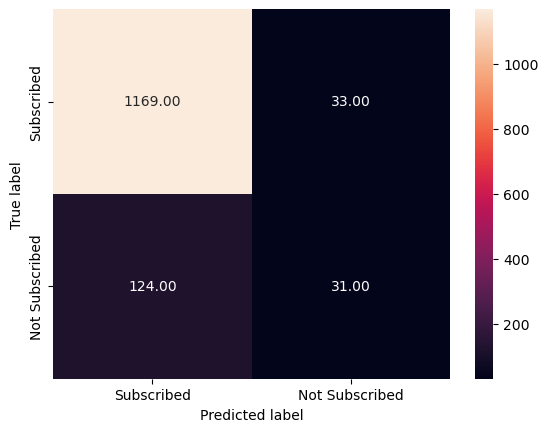

In [42]:
## Predicting on test set
pred_y = knn_clf.predict(X_test)
## Drawing the confusion matrix for KNN model
draw_cm( y_test, pred_y )

In [44]:
print( metrics.classification_report( y_test, pred_y ) )

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1202
           1       0.48      0.20      0.28       155

    accuracy                           0.88      1357
   macro avg       0.69      0.59      0.61      1357
weighted avg       0.86      0.88      0.86      1357



In [45]:
## Importing GridSearchCV
from sklearn.model_selection import GridSearchCV
## Creating a dictionary with hyperparameters and possible values for searching
tuned_parameters = [{'n_neighbors': range(5,10),
'metric': ['canberra', 'euclidean', 'minkowski']}]
## Configuring grid search
clf = GridSearchCV(KNeighborsClassifier(),
tuned_parameters,
cv=10,
scoring='roc_auc')
## fit the search with training set
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': range(5, 10)}],
             scoring='roc_auc')

In [46]:
clf.best_score_

0.7859915012939207

In [47]:
clf.best_params_

{'metric': 'canberra', 'n_neighbors': 9}

# Random Forest

In [48]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
## Initializing the Random Forest Classifier with max_dept and n_estimators
radm_clf = RandomForestClassifier( max_depth=10, n_estimators=10)
radm_clf.fit( X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10)

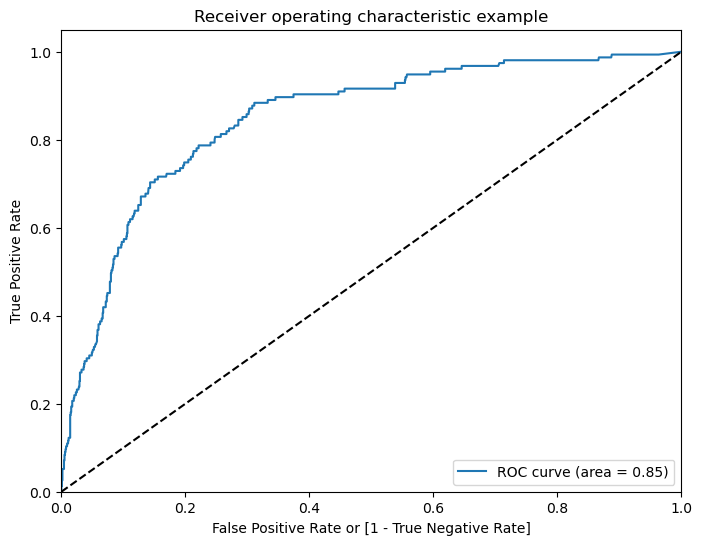

In [49]:
_, _, _, _ = draw_roc_curve( radm_clf, X_test, y_test );

In [50]:
## Configuring hyper-parameters and values for searched
tuned_parameters = [{'max_depth': [10, 15],
'n_estimators': [10,20],
'max_features': ['sqrt', 'auto']}] # 8 set of hyperparameters

# number of combination of hyperparameters - 2 X 2 X 2 = 8  

# 5 fold cross validation -> 5X8 = 40 times training is happning

## Initializing the RF classifier
radm_clf = RandomForestClassifier()

## Configuring search with the tunable parameters
clf = GridSearchCV(radm_clf,
tuned_parameters,
cv=5,
scoring='roc_auc')

## Fitting the training set
clf.fit(X_train, y_train )

C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Windows\anaconda3\Lib\site

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 15],
                          'max_features': ['sqrt', 'auto'],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [51]:
clf.best_score_

0.8551307940249482

In [52]:
clf.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 20}

In [54]:
## Initializing the Random Forest Mode with the optimal values
radm_clf = RandomForestClassifier( max_depth=10, n_estimators=20, max_features ='sqrt')

## Fitting the model with the training set
radm_clf.fit( X_train, y_train )

RandomForestClassifier(max_depth=10, n_estimators=20)

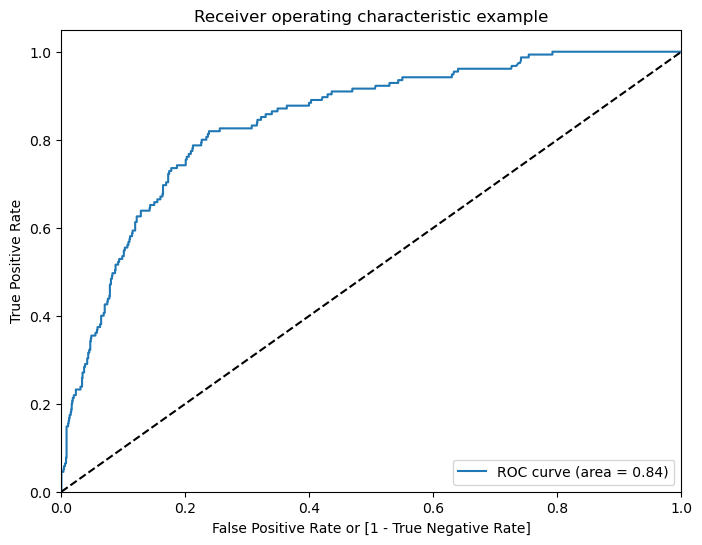

In [55]:
_, _, _, _ = draw_roc_curve( clf, X_test, y_test )

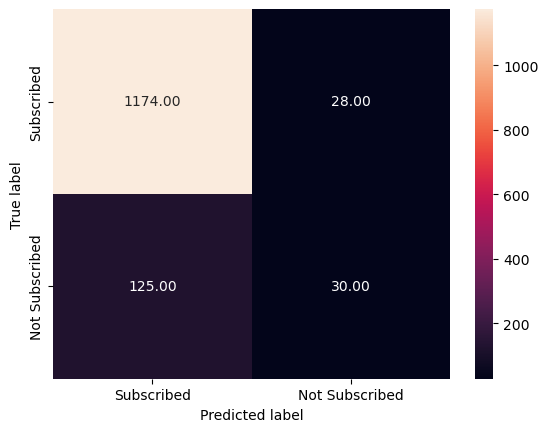

In [56]:
pred_y = radm_clf.predict( X_test )
draw_cm( y_test, pred_y )

In [57]:
print( metrics.classification_report( y_test, pred_y ) )

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1202
           1       0.52      0.19      0.28       155

    accuracy                           0.89      1357
   macro avg       0.71      0.59      0.61      1357
weighted avg       0.86      0.89      0.86      1357

